In [2]:
import damask
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
resultfile_path = 'DP_Steel/grid_DP_100_tensionX_Material_DP_numerics.hdf5'

In [ ]:
result = damask.Result(resultfile_path)
try:
    result.add_stress_Cauchy()
except ValueError:
    pass
try:
    result.add_equivalent_Mises('sigma')
except ValueError:
    pass
try:
    result.add_stress_second_Piola_Kirchhoff()
except ValueError:
    pass

try:
    result.add_strain()
except ValueError:
    pass

postprossecing_dir = Path(resultfile_path).stem
vti_path = "DP_Steel/grid_DP_100.vti"
grid = damask.GeomGrid.load(vti_path)
grid

# Example: Stress-strain curve for tensionX

In [ ]:
data = result.get(['F','P']).values()

Ferrite_F_list = []
Martensite_F_list = []
for inc in data:
    Ferrite_F = inc['Ferrite']['F']
    Martensite_F = inc['Martensite']['F']
    Ferrite_F_list.append(Ferrite_F)
    Martensite_F_list.append(Martensite_F)

In [ ]:
Ferrite_F_list = np.array(Ferrite_F_list)
Martensite_F_list = np.array(Martensite_F_list)

Ferrite_F_11 = Ferrite_F_list[:,:,0,0]
Martensite_F_11 = Martensite_F_list[:,:,0,0]

In [ ]:
epsilon_11_Ferrite = np.average(Ferrite_F_11, axis=1) # average over all points
epsilon_11_Martensite = np.average(Martensite_F_11, axis=1) # average over all points


factor = len(Ferrite_F_11)/(len(Ferrite_F_11) + len(Martensite_F_11))
epsilon_11 = (epsilon_11_Ferrite - 1)* factor + (epsilon_11_Martensite - 1) * (1 - factor)# average over phases

plt.plot(epsilon_11, label='Total')
plt.plot(epsilon_11_Ferrite - 1, label='Ferrite')
plt.plot(epsilon_11_Martensite - 1, label='Martensite')
plt.xlabel('Increment')
plt.ylabel('Strain 11')
plt.legend()

In [ ]:
data = result.get(['epsilon_V^0.0(F)']).values()

Ferrite_epsilon_list = []
Martensite_epsilon_list = []
for inc in data:
    Ferrite_F = inc['Ferrite']
    Martensite_F = inc['Martensite']
    Ferrite_epsilon_list.append(Ferrite_F)
    Martensite_epsilon_list.append(Martensite_F)

In [ ]:
Ferrite_epsilon_list = np.array(Ferrite_epsilon_list)
Martensite_epsilon_list = np.array(Martensite_epsilon_list)

Ferrite_epsilon_11 = Ferrite_epsilon_list[:,:,0,0]
Martensite_epsilon_11 = Martensite_epsilon_list[:,:,0,0]

In [ ]:
epsilon_11_Ferrite_strain = np.average(Ferrite_epsilon_11, axis=1) # average over all points
epsilon_11_Martensite_strain = np.average(Martensite_epsilon_11, axis=1) # average over all points


factor = len(Ferrite_F_11)/(len(Ferrite_F_11) + len(Martensite_F_11))
epsilon_11_strain = (epsilon_11_Ferrite_strain)* factor + (epsilon_11_Martensite_strain) * (1 - factor)# average over phases

plt.plot(epsilon_11_strain, label='Total')
plt.plot(epsilon_11_Ferrite_strain, label='Ferrite')
plt.plot(epsilon_11_Martensite_strain, label='Martensite')
plt.xlabel('Increment')
plt.ylabel('Strain 11')
plt.legend()

In [ ]:
data = result.get(['sigma']).values()

Ferrite_sigma_list = []
Martensite_sigma_list = []
for inc in data:
    Ferrite_sigma = inc['Ferrite']
    Martensite_sigma = inc['Martensite']
    Ferrite_sigma_list.append(Ferrite_sigma)
    Martensite_sigma_list.append(Martensite_sigma)

In [ ]:
Ferrite_sigma_list = np.array(Ferrite_sigma_list)
Martensite_sigma_list = np.array(Martensite_sigma_list)

Ferrite_sigma_11 = Ferrite_sigma_list[:,:,0,0]
Martensite_sigma_11 = Martensite_sigma_list[:,:,0,0]

In [ ]:
sigma_11_Ferrite = np.average(Ferrite_sigma_11, axis=1) # average over all points
sigma_11_Martensite = np.average(Martensite_sigma_11, axis=1) # average over all points


factor = len(Ferrite_F_11)/(len(Ferrite_F_11) + len(Martensite_F_11))

sigma_11 = (sigma_11_Ferrite)* factor + (sigma_11_Martensite) * (1 - factor)# average over phases

plt.plot(epsilon_11_strain, sigma_11 / 1e6, label='Total')
plt.plot(epsilon_11_Ferrite_strain, sigma_11_Ferrite / 1e6,label='Ferrite')
plt.plot(epsilon_11_Martensite_strain, sigma_11_Martensite / 1e6,label='Martensite')
plt.xlabel('Stress')
plt.ylabel('Sigma 11')
plt.legend()

In [30]:
result._visible
result_fe = result
result_fe._visible['phases'] = [np.str_('Ferrite')]
result_mat = result
result_mat._visible['phases'] = [np.str_('Martensite')]

In [32]:
result_fe.export_VTK()

# Damage部分

In [1]:
resultfile_path = 'Damage_Steel_Dual/grid_Steel_100_damage_tensionX_Damage_Steel_damage_numerics.hdf5'

In [4]:
result = damask.Result(resultfile_path)
try:
    result.add_stress_Cauchy()
except ValueError:
    pass
try:
    result.add_equivalent_Mises('sigma')
except ValueError:
    pass
try:
    result.add_stress_second_Piola_Kirchhoff()
except ValueError:
    pass

try:
    result.add_strain()
except ValueError:
    pass

postprossecing_dir = Path(resultfile_path).stem
vti_path = "DP_Steel/grid_DP_100.vti"
grid = damask.GeomGrid.load(vti_path)
grid

cells:  200 × 200 × 5
size:   0.002 × 0.002 × 5e-05 m³
origin: 0.0   0.0   0.0 m
# materials: 100

In [5]:
data = result.get(['Psi_D']).values()

Fe_D_list = []
X2Cr_D_list = []
for inc in data:
    Psi1 = inc['Ferrite']
    Fe_D_list.append(Psi1)
    Psi2 = inc['X2CrNiMo']
    X2Cr_D_list.append(Psi2)

In [6]:
Fe_D_list = np.array(Fe_D_list)
X2Cr_D_list = np.array(X2Cr_D_list)
Fe_D = np.average(Fe_D_list, axis=1) # average over all points
X2Cr_D = np.average(X2Cr_D_list, axis=1) # average

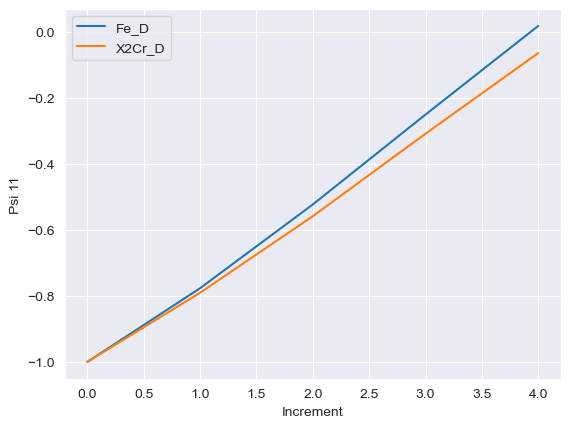

In [7]:
plt.plot(Fe_D - 1, label='Fe_D')
plt.plot(X2Cr_D - 1, label='X2Cr_D')
plt.xlabel('Increment')
plt.ylabel('Psi 11')
plt.legend()

In [8]:
result.export_VTK()

In [12]:
result_fe = result
result_fe._visible['phases'] = [np.str_('Ferrite')]
result_fe.export_VTK()

# Damage Singal

In [13]:
resultfile_path = 'Damage_Steel_Singal\\grid_Steel_100_damage_tensionX_Damage_Steel_damage_singla_numerics.hdf5'
result = damask.Result(resultfile_path)
result = damask.Result(resultfile_path)
try:
    result.add_stress_Cauchy()
except ValueError:
    pass
try:
    result.add_equivalent_Mises('sigma')
except ValueError:
    pass
try:
    result.add_stress_second_Piola_Kirchhoff()
except ValueError:
    pass

try:
    result.add_strain()
except ValueError:
    pass

postprossecing_dir = Path(resultfile_path).stem
vti_path = "DP_Steel/grid_DP_100.vti"
grid = damask.GeomGrid.load(vti_path)
grid

cells:  200 × 200 × 5
size:   0.002 × 0.002 × 5e-05 m³
origin: 0.0   0.0   0.0 m
# materials: 100

In [14]:
result.export_VTK()